## Installs and Import

In [116]:
!pip install langgraph

In [117]:
import random
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END

## Simple Graph

In [118]:
class AgentState(TypedDict):
  message: str

def greeter(state: AgentState) -> AgentState:
  """Simple node that adds a greeting message to the state"""
  state["message"] = f"Hi {state['message']}, How are you?"
  return state

In [119]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeter)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

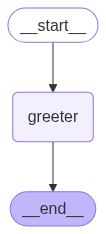

In [120]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [121]:
result = app.invoke({"message": "Romit"})

In [122]:
result

{'message': 'Hi Romit, How are you?'}

## Multiple Input Graph

In [123]:
class AgentState(TypedDict):
  name: str
  input: List[int]
  result: str

def processor(state: AgentState) -> AgentState:
  """This function handles multiple different inputs"""
  sums = sum(state["input"])
  state["result"] = f"Hi {state['name']}, Here is your answer {sums}?"
  return state

In [124]:
graph = StateGraph(AgentState)

graph.add_node("processor", processor)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

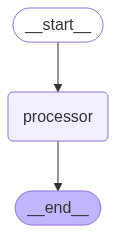

In [125]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [126]:
result = app.invoke({"name": "Romit", "input": [1, 2, 3, 4]})

In [127]:
result["result"]

'Hi Romit, Here is your answer 10?'

## Sequential Graph

In [128]:
class AgentState(TypedDict):
  name: str
  birth_year: int
  result: str

def first_node(state: AgentState) -> AgentState:
  """This is the first node of our sequence"""
  state["name"] = f"Hi {state['name']}"
  return state

def second_node(state: AgentState) -> AgentState:
  """This is the second node of our sequence"""
  age = 2025 - state["birth_year"]
  state["result"] = f"{state['name']}, You are {age} years old today"
  return state

In [129]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_edge("first_node", "second_node")

graph.set_entry_point("first_node")
graph.set_finish_point("second_node")

app = graph.compile()

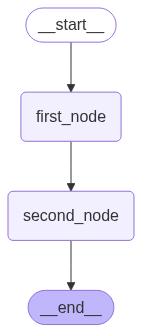

In [130]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [131]:
result = app.invoke({"name": "Romit", "birth_year": 1994})

In [132]:
result["result"]

'Hi Romit, You are 31 years old today'

## Conditional Graph

In [133]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [134]:
def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    return state


def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

In [135]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    # Edge: Node
    path_map = {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

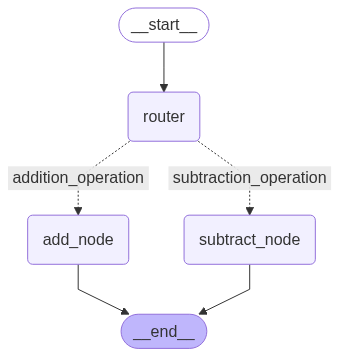

In [136]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [137]:
result = app.invoke({"number1": 5, "operation": "-", "number2": 1})

In [138]:
result

{'number1': 5, 'operation': '-', 'number2': 1, 'finalNumber': 4}

In [139]:
result = app.invoke({"number1": 5, "operation": "+", "number2": 1})

In [140]:
result

{'number1': 5, 'operation': '+', 'number2': 1, 'finalNumber': 6}

## Conditonal Graph 2

In [141]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    number3: int
    operation2: str
    number4: int
    finalNumber1: int
    finalNumber2: int

In [142]:
def adder1(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtractor1(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def adder2(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtractor2(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state


def decide_next_node1(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation1"] == "+":
        return "addition_operation1"
    elif state["operation1"] == "-":
        return "subtraction_operation1"

def decide_next_node2(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [143]:
graph = StateGraph(AgentState)

graph.add_node("add_node1", adder1)
graph.add_node("subtract_node1", subtractor1)
graph.add_node("router1", lambda state:state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    # Edge: Node
    path_map = {
        "addition_operation1": "add_node1",
        "subtraction_operation1": "subtract_node1"
    }
)

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    # Edge: Node
    path_map = {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

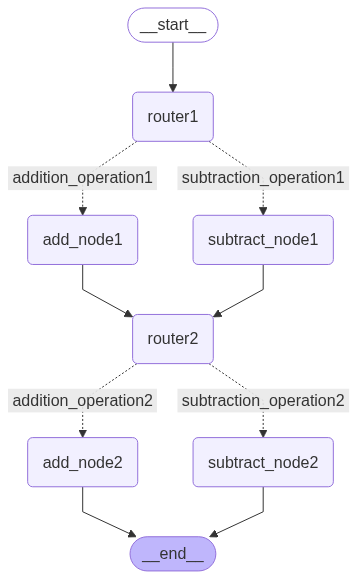

In [144]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [145]:
result = app.invoke({"number1": 5, "operation1": "-", "number2": 1, "number3": 5, "operation2": "+", "number4": 1})

In [146]:
result

{'number1': 5,
 'operation1': '-',
 'number2': 1,
 'number3': 5,
 'operation2': '+',
 'number4': 1,
 'finalNumber1': 4,
 'finalNumber2': 6}

In [147]:
result = app.invoke({"number1": 5, "operation1": "+", "number2": 1, "number3": 5, "operation2": "-", "number4": 1})

In [148]:
result

{'number1': 5,
 'operation1': '+',
 'number2': 1,
 'number3': 5,
 'operation2': '-',
 'number4': 1,
 'finalNumber1': 6,
 'finalNumber2': 4}

## Looping

In [149]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [150]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there, {state['name']}"
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state


def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"  # Continue looping
    else:
        return "exit"  # Exit the loop

In [151]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")


graph.add_conditional_edges(
    "random",     # Source node
    should_continue, # Action
    {
        "loop": "random",
        "exit": END
    }
)

graph.set_entry_point("greeting")

app = graph.compile()

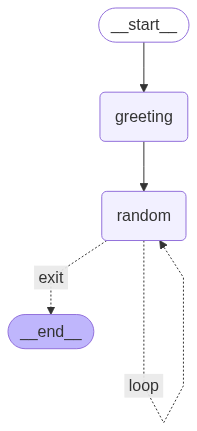

In [152]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [153]:
app.invoke({"name":"Vaibhav", "number":[], "counter":1})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Vaibhav', 'number': [4, 3, 2, 10, 9], 'counter': 5}